In [1]:
import MotionClouds as mc
import numpy as np

(512, 256, 1)
File already exits, not saved.


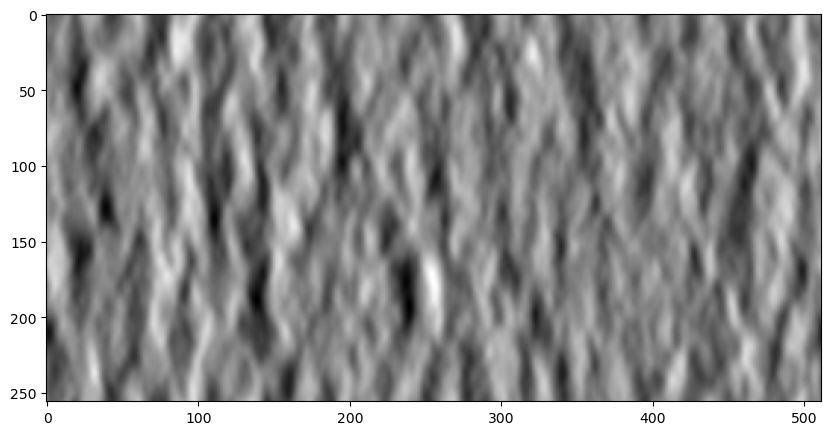

In [56]:
mc.N_X = 512 # image resolution
mc.N_Y = 256 # image resolution
mc.N_frame=1 # number of frames, keep at 1 for static images
sf_0 = 0.05 # spatial frequency
B_sf = 0.05 # spatial frequency distribution 
theta = 0 # orientation in radians (0 = vertical, np.pi/2 is horizontal)
B_theta = 0.4 # distribution of orientations 
alpha = 1 # keep at 0, frequency distribution (0 ~ pink noise, 1 ~ white noise)
seed = 1 # seed for randomization 
name = "static-sf_0="+str(sf_0)+"-B_sf="+str(B_sf)+"-theta="+str(theta)+"-B_theta="+str(B_theta)+"-alpha="+str(alpha)+"-seed="+str(seed) #

fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)
env = mc.envelope_gabor(fx, fy, ft, V_X=0, V_Y=0., B_V=0, sf_0=sf_0, B_sf=B_sf, theta=theta, B_theta=B_theta, alpha=alpha)
z = mc.rectif(mc.random_cloud(env, seed=1)) #can set seed for randomization 
print(z.shape)
z = z.reshape((mc.N_X, mc.N_Y))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(z.T, cmap=plt.gray())

movie = mc.random_cloud(env)
movie = mc.rectif(movie)

try:
    mc.anim_save(movie, name, display=False, vext='.png')
except:
    print ("File already exits, not saved.")